In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('./output/class/best2.csv')
best = data.target.values

In [3]:
best

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [4]:
preds = []
paths=['./output/class/blend_proba.csv',
      './output/class/blend_1.csv',
      './output/class/blend_2.csv',
      './output/class/blend_3.csv',
      './output/class/blend_4.csv',
      './output/class/blend_5.csv',
      './output/best.csv',
       './output/submission/lgbm_800.csv',
      './output/class/best2.csv',
      './output/class/blended_1.csv',
       './output/class/blended_2.csv',
       './output/class/blended_3.csv',
       './output/class/blended_4.csv',
       './output/class/blended_5.csv',
      './output/class/blended_best_plus_proba.csv',
       './output/lgbm_newcolumns.csv',
       './output/class/idk.csv',
       './output/submission/lgbm_blended_2.csv'
      ]
for path in paths:
    data = pd.read_csv(path)
    data = data.target.values
    preds.append(data)
    

In [5]:
covs=[]
for path, pred in zip(paths,preds):
    x=np.cov(best,pred)[0,1]
    covs.append(x)
    print(path,'cov:',x)

./output/class/blend_proba.csv cov: 0.1861406320217939
./output/class/blend_1.csv cov: 0.18523265900905722
./output/class/blend_2.csv cov: 0.18637082967351182
./output/class/blend_3.csv cov: 0.18659511041680205
./output/class/blend_4.csv cov: 0.18612238362095088
./output/class/blend_5.csv cov: 0.1858221517103688
./output/best.csv cov: 0.18820625448915196
./output/submission/lgbm_800.csv cov: 0.18820625448915196
./output/class/best2.csv cov: 0.18853447553110456
./output/class/blended_1.csv cov: 0.18518753167618174
./output/class/blended_2.csv cov: 0.18657143655102534
./output/class/blended_3.csv cov: 0.18713799433239262
./output/class/blended_4.csv cov: 0.18690348052478492
./output/class/blended_5.csv cov: 0.18655861450541222
./output/class/blended_best_plus_proba.csv cov: 0.1879102140929951
./output/lgbm_newcolumns.csv cov: 0.18291612525901063
./output/class/idk.csv cov: 0.18530885945927814
./output/submission/lgbm_blended_2.csv cov: 0.18657143655102534


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)


# Plot
for i in range(len(preds)):
    ax.bar(x=i,height=covs[i],label=paths[i])
    
ax.set_ylim(min(covs)-0.001,max(covs)+0.001)
ax.set(xlabel='files', ylabel='cov',
       title='Cov to best')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

<Figure size 1600x1000 with 1 Axes>

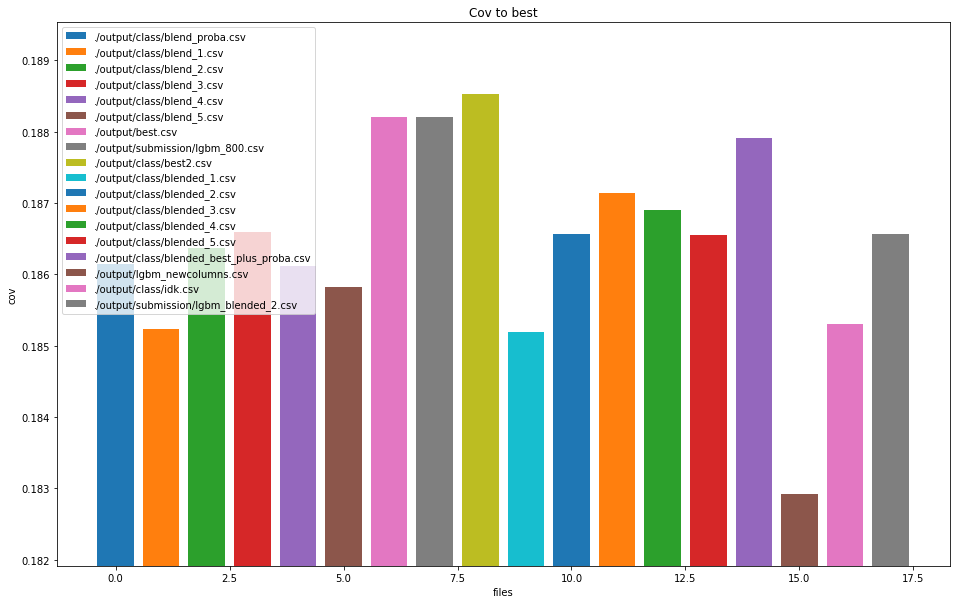

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)


# Plot
for i in range(len(preds)):
    ax.bar(x=i,height=covs[i],label=paths[i])
    
ax.set_ylim(min(covs)-0.001,max(covs)+0.001)
ax.set(xlabel='files', ylabel='cov',
       title='Cov to best')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()